**Начало лабораторной работы**

In [8]:
import pandas as pd
df = pd.read_csv("..//static//csv//ds_salaries.csv")
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [10]:
df.head()

work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M

In [9]:
df.describe()

work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000

In [11]:
# Процент пропущенных значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f'{i} Процент пустых значений: %{null_rate:.2f}')

print(df.isnull().sum())

print(df.isnull().any())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool


Классификация

'X_train'

work_year experience_level employment_type                  job_title  \
1809       2023               SE              FT              Data Engineer   
1082       2023               SE              FT  Machine Learning Engineer   
1686       2023               SE              FT               BI Developer   
1600       2023               SE              FT             Data Scientist   
1376       2023               SE              FT              Data Engineer   
...         ...              ...             ...                        ...   
2706       2022               SE              FT              Data Engineer   
928        2023               MI              FT              Data Engineer   
564        2023               MI              FT              Data Engineer   
716        2023               SE              FT             Data Scientist   
1299       2023               SE              FT              Data Engineer   

      salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
1809  182000             USD         182000                 US           100   
1082  126000             USD         126000                 US             0   
1686  140000             USD         140000                 US           100   
1600  140000             USD         140000                 US             0   
1376  226700             USD         226700                 US             0   
...      ...             ...            ...                ...           ...   
2706  160000             USD         160000                 US           100   
928   200000             USD         200000                 US             0   
564   140000             USD         140000                 US             0   
716   297300             USD         297300                 US           100   
1299  133832             USD         133832                 US             0   

     company_location company_size  above_median_salary salary_category  
1809               US            M                    1               1  
1082               US            M                    0               1  
1686               US            M                    1               1  
1600               US            M                    1               1  
1376               US            M                    1               2  
...               ...          ...                  ...             ...  
2706               US            M                    1               1  
928                US            M                    1               1  
564                US            M                    1               1  
716                US            M                    1               2  
1299               US            M                    0               1  

[3004 rows x 13 columns]

'y_train'

above_median_salary
1809                    1
1082                    0
1686                    1
1600                    1
1376                    1
...                   ...
2706                    1
928                     1
564                     1
716                     1
1299                    0

[3004 rows x 1 columns]

'X_test'

work_year experience_level employment_type  \
3459       2022               MI              FT   
3724       2021               EN              FT   
1795       2023               SE              FT   
3535       2021               MI              FT   
3255       2022               MI              FT   
...         ...              ...             ...   
1943       2022               MI              FT   
573        2023               EN              FT   
3013       2022               SE              FT   
327        2023               EN              FT   
1565       2023               SE              FT   

                          job_title  salary salary_currency  salary_in_usd  \
3459             Research Scientist   59000             EUR          61989   
3724          Business Data Analyst   50000             EUR          59102   
1795                  Data Engineer  180000             USD         180000   
3535                 Data Scientist   50000             USD          50000   
3255                   Data Analyst  106260             USD         106260   
...                             ...     ...             ...            ...   
1943                  Data Engineer  120000             USD         120000   
573   Autonomous Vehicle Technician    7000             USD           7000   
3013      Machine Learning Engineer  129300             USD         129300   
327                  Data Scientist   70000             CAD          51753   
1565                   Data Analyst   48000             EUR          51508   

     employee_residence  remote_ratio company_location company_size  \
3459                 AT             0               AT            L   
3724                 LU           100               LU            L   
1795                 US             0               US            M   
3535                 NG           100               NG            L   
3255                 US             0               US            M   
...                 ...           ...              ...          ...   
1943                 US           100               US            M   
573                  GH             0               GH            S   
3013                 US             0               US            M   
327                  CA           100               CA            L   
1565                 ES             0               ES            M   

      above_median_salary salary_category  
3459                    0               0  
3724                    0               0  
1795                    1               1  
3535                    0               0  
3255                    0               1  
...                   ...             ...  
1943                    0               1  
573                     0               0  
3013                    0               1  
327                     0               0  
1565                    0               0  

[751 rows x 13 columns]

'y_test'

above_median_salary
3459                    0
3724                    0
1795                    1
3535                    0
3255                    0
...                   ...
1943                    0
573                     0
3013                    0
327                     0
1565                    0

[751 rows x 1 columns]

work_year                 int64
experience_level         object
employment_type          object
job_title                object
salary                    int64
salary_currency          object
salary_in_usd             int64
employee_residence       object
remote_ratio              int64
company_location         object
company_size             object
above_median_salary       int64
salary_category        category
dtype: object


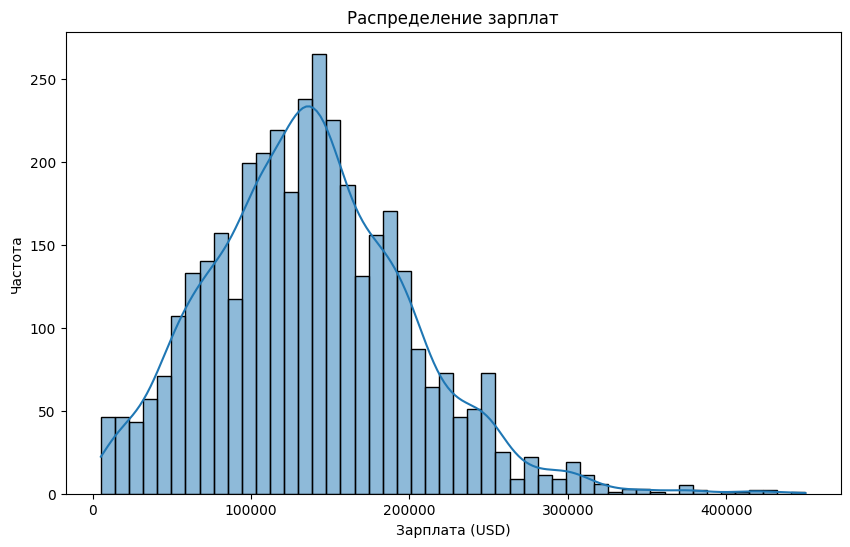

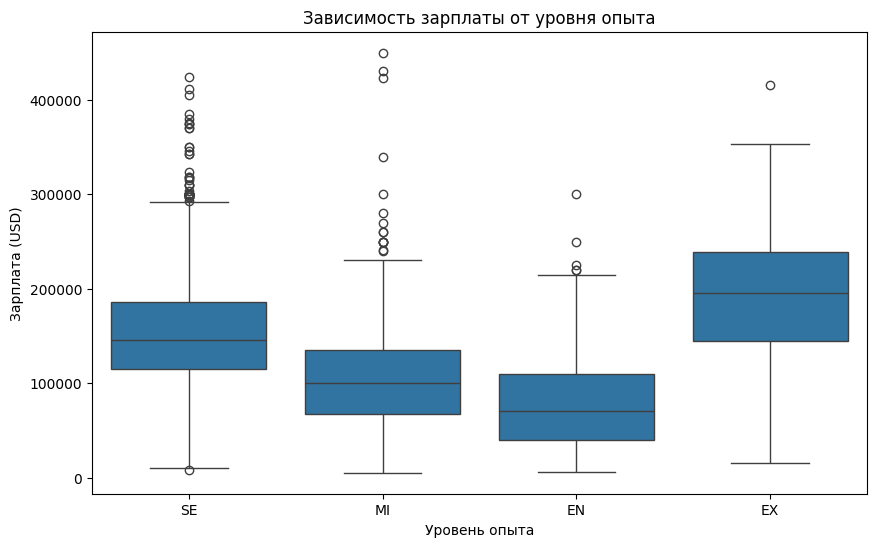

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split

# Загрузка данных
df = pd.read_csv("..//static//csv//ds_salaries.csv")

# Создание целевого признака
median_salary = df['salary_in_usd'].median()
df['above_median_salary'] = np.where(df['salary_in_usd'] > median_salary, 1, 0)

# Разделение на признаки и целевую переменную
X = df.drop(columns=['salary_in_usd', 'above_median_salary'])
y = df['above_median_salary']

# Примерная категоризация
df['salary_category'] = pd.cut(df['salary_in_usd'], bins=[0, 100000, 200000, np.inf], labels=[0, 1, 2])

# Выбор признаков и целевых переменных
X = df.drop(columns=['salary_in_usd', 'salary_category'])

def split_stratified_into_train_val_test(
    df_input,
    stratify_colname="y",
    frac_train=0.6,
    frac_val=0.15,
    frac_test=0.25,
    random_state=None,
) -> Tuple[DataFrame, DataFrame, DataFrame, DataFrame, DataFrame, DataFrame]:
   
    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError(
            "fractions %f, %f, %f do not add up to 1.0"
            % (frac_train, frac_val, frac_test)
        )
    
    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))
    X = df_input  # Contains all columns.
    y = df_input[
        [stratify_colname]
    ]  # Dataframe of just the column on which to stratify.
    
    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )

    if frac_val <= 0:
        assert len(df_input) == len(df_train) + len(df_temp)
        return df_train, pd.DataFrame(), df_temp, y_train, pd.DataFrame(), y_temp
    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)

    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)
    return df_train, df_val, df_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = split_stratified_into_train_val_test(
    df, stratify_colname="above_median_salary", frac_train=0.80, frac_val=0, frac_test=0.20, random_state=42
)

display("X_train", X_train)
display("y_train", y_train)

display("X_test", X_test)
display("y_test", y_test)

# Проверка преобразования
print(df.dtypes)

# Визуализация распределения зарплат
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=50, kde=True)
plt.title('Распределение зарплат')
plt.xlabel('Зарплата (USD)')
plt.ylabel('Частота')
plt.show()

# Визуализация зависимости между зарплатой и уровнем опыта
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Зависимость зарплаты от уровня опыта')
plt.xlabel('Уровень опыта')
plt.ylabel('Зарплата (USD)')
plt.show()

Теперь перейдем к делению на выборки и созданию ориентира

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Загрузка данных
df = pd.read_csv("..//static//csv//ds_salaries.csv")

# Создание целевого признака
median_salary = df['salary_in_usd'].median()
df['above_median_salary'] = np.where(df['salary_in_usd'] > median_salary, 1, 0)

# Разделение на признаки и целевую переменную
features = ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'remote_ratio', 'employee_residence', 'company_location', 'company_size']
target = 'above_median_salary'

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42, stratify=df[target])

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

# Создание ориентира (baseline)
baseline_threshold = y_train.mean()
baseline_predictions = [1 if pred > baseline_threshold else 0 for pred in [baseline_threshold] * len(y_test)]

# Вычисление метрик для ориентира
baseline_accuracy = accuracy_score(y_test, baseline_predictions)
baseline_f1 = f1_score(y_test, baseline_predictions, average='weighted')

print('Baseline Accuracy:', baseline_accuracy)
print('Baseline F1 Score:', baseline_f1)

Размер обучающей выборки: (3004, 10)
Размер тестовой выборки: (751, 10)
Baseline Accuracy: 0.5126498002663116
Baseline F1 Score: 0.3474826991241725


Создание конвейера и обучение моделей

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Загрузка данных
df = pd.read_csv("..//static//csv//ds_salaries.csv")

# Создание целевого признака
median_salary = df['salary_in_usd'].median()
df['above_median_salary'] = np.where(df['salary_in_usd'] > median_salary, 1, 0)

# Разделение на признаки и целевую переменную
X = df.drop(columns=['salary_in_usd', 'above_median_salary'])
y = df['above_median_salary']

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Определение столбцов
numeric_columns = ["work_year", "salary", "remote_ratio"]
cat_columns = ["experience_level", "employment_type", "job_title", "salary_currency", "employee_residence", "company_location", "company_size"]

# Предобработка данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns)])

# Создание конвейеров для моделей
pipeline_logistic_regression = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))])

pipeline_decision_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))])

pipeline_gradient_boosting = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))])

# Список конвейеров 
pipelines = [
    ('Logistic Regression', pipeline_logistic_regression),
    ('Decision Tree', pipeline_decision_tree),
    ('Gradient Boosting', pipeline_gradient_boosting)
]

# Обучение моделей и вывод результатов
for name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 40)

Model: Logistic Regression
Accuracy: 0.7523
F1 Score: 0.7609
----------------------------------------
Model: Decision Tree
Accuracy: 0.9960
F1 Score: 0.9959
----------------------------------------
Model: Gradient Boosting
Accuracy: 0.9947
F1 Score: 0.9945
----------------------------------------


Оценка качества моделей

In [27]:
from sklearn.metrics import accuracy_score, f1_score

for name, pipeline in pipelines:
    y_pred = pipeline.predict(X_test)
    print(f"Model: {name}")
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))
    print()

Model: Logistic Regression
Accuracy: 0.7523302263648469
F1 Score: 0.7517841210039291

Model: Decision Tree
Accuracy: 0.996005326231691
F1 Score: 0.9960048583691977

Model: Gradient Boosting
Accuracy: 0.9946737683089214
F1 Score: 0.9946728986768623



Регрессия
Цель: Разработать модель регрессии, которая будет предсказывать зарплату (salary_in_usd) на основе демографических данных, типа работы и других факторов.

In [28]:
import pandas as pd
from scipy import stats

# Загрузка данных
df = pd.read_csv("..//static//csv//ds_salaries.csv")

# Определение числовых признаков
numeric_features = ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']

# Вычисление z-оценок для числовых признаков
z_scores = stats.zscore(df[numeric_features])

# Определение порога для удаления выбросов
threshold = 3

# Удаление выбросов
df_cleaned = df[(z_scores < threshold).all(axis=1)]

print("Размер данных до удаления выбросов:", df.shape)
print("Размер данных после удаления выбросов:", df_cleaned.shape)

Размер данных до удаления выбросов: (3755, 11)
Размер данных после удаления выбросов: (3708, 11)


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Определение признаков и целевой переменной
features = ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_currency', 'remote_ratio', 'employee_residence', 'company_location', 'company_size']
target = 'salary_in_usd'

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(df_cleaned[features], df_cleaned[target], test_size=0.2, random_state=42)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

# Создание ориентира (baseline)
baseline_predictions = [y_train.mean()] * len(y_test)

# Вычисление метрик для ориентира
print('Baseline MAE:', mean_absolute_error(y_test, baseline_predictions))
print('Baseline MSE:', mean_squared_error(y_test, baseline_predictions))
print('Baseline R²:', r2_score(y_test, baseline_predictions))

Размер обучающей выборки: (2966, 9)
Размер тестовой выборки: (742, 9)
Baseline MAE: 48988.97819674187
Baseline MSE: 3791583837.2779293
Baseline R²: -0.005051587587466155


In [31]:
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Загрузка данных
df = pd.read_csv("..//static//csv//ds_salaries.csv")

# Определение числовых признаков
numeric_features = ['work_year', 'salary_in_usd', 'remote_ratio']

# Вычисление z-оценок для числовых признаков
z_scores = stats.zscore(df[numeric_features])

# Определение порога для удаления выбросов
threshold = 3

# Удаление выбросов
df_cleaned = df[(z_scores < threshold).all(axis=1)]

print("Размер данных до удаления выбросов:", df.shape)
print("Размер данных после удаления выбросов:", df_cleaned.shape)

# Разделение на выборки и создание ориентира
features = ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_currency', 'remote_ratio', 'employee_residence', 'company_location', 'company_size']
target = 'salary_in_usd'

X_train, X_test, y_train, y_test = train_test_split(df_cleaned[features], df_cleaned[target], test_size=0.2, random_state=42)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

# Создание ориентира (baseline)
baseline_predictions = [y_train.mean()] * len(y_test)

print('Baseline MAE:', mean_absolute_error(y_test, baseline_predictions))
print('Baseline MSE:', mean_squared_error(y_test, baseline_predictions))
print('Baseline R²:', r2_score(y_test, baseline_predictions))

# Создание конвейера и обучение моделей
categorical_features = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
numeric_features = ['work_year', 'remote_ratio']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

pipeline_linear_regression = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())])

pipeline_decision_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))])

pipeline_gradient_boosting = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))])

pipelines = [
    ('Linear Regression', pipeline_linear_regression),
    ('Decision Tree', pipeline_decision_tree),
    ('Gradient Boosting', pipeline_gradient_boosting)
]

for name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    print(f"Model: {name} trained.")

# Оценка качества моделей
for name, pipeline in pipelines:
    y_pred = pipeline.predict(X_test)
    print(f"Model: {name}")
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('R²:', r2_score(y_test, y_pred))
    print()

Размер данных до удаления выбросов: (3755, 11)
Размер данных после удаления выбросов: (3733, 11)
Размер обучающей выборки: (2986, 9)
Размер тестовой выборки: (747, 9)
Baseline MAE: 47593.92288600708
Baseline MSE: 3680965527.9964128
Baseline R²: -0.0016576422593919116
Model: Linear Regression trained.
Model: Decision Tree trained.
Model: Gradient Boosting trained.
Model: Linear Regression
MAE: 36617.65439873256
MSE: 2194684192.4416404
R²: 0.4027865306031213

Model: Decision Tree
MAE: 36516.71804922624
MSE: 2246643776.062331
R²: 0.38864738324451775

Model: Gradient Boosting
MAE: 35842.80843437428
MSE: 2125285552.2470944
R²: 0.42167116230764956



In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

for name, pipeline in pipelines:
    y_pred = pipeline.predict(X_test)
    print(f"Model: {name}")
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('R²:', r2_score(y_test, y_pred))
    print()

Model: Linear Regression
MAE: 36617.65439873256
MSE: 2194684192.4416404
R²: 0.4027865306031213

Model: Decision Tree
MAE: 36516.71804922624
MSE: 2246643776.062331
R²: 0.38864738324451775

Model: Gradient Boosting
MAE: 35842.80843437428
MSE: 2125285552.2470944
R²: 0.42167116230764956



In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Загрузка данных
df = pd.read_csv("..//static//csv//ds_salaries.csv")

# Проверка на пропущенные значения
print("Пропущенные значения:\n", df.isnull().sum())

# Удаление строк с пропущенными значениями
df = df.dropna()

# Выбор признаков и целевой переменной
features = ['work_year', 'experience_level', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
target = 'salary_in_usd'

# Определение категориальных и числовых признаков
categorical_features = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
numeric_features = ['work_year', 'remote_ratio']

# Создание пайплайна для обработки данных
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Преобразование данных
X = preprocessor.fit_transform(df[features])
y = df[target]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Пропущенные значения:
 work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


d:\MII\AIM-PIbd-32-Kaznacheeva-E-K\aimenv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
d:\MII\AIM-PIbd-32-Kaznacheeva-E-K\aimenv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
6 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "d:\MII\AIM-PIbd-32-Kaznacheeva-E-K\aimenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\MII\AIM-PIbd-

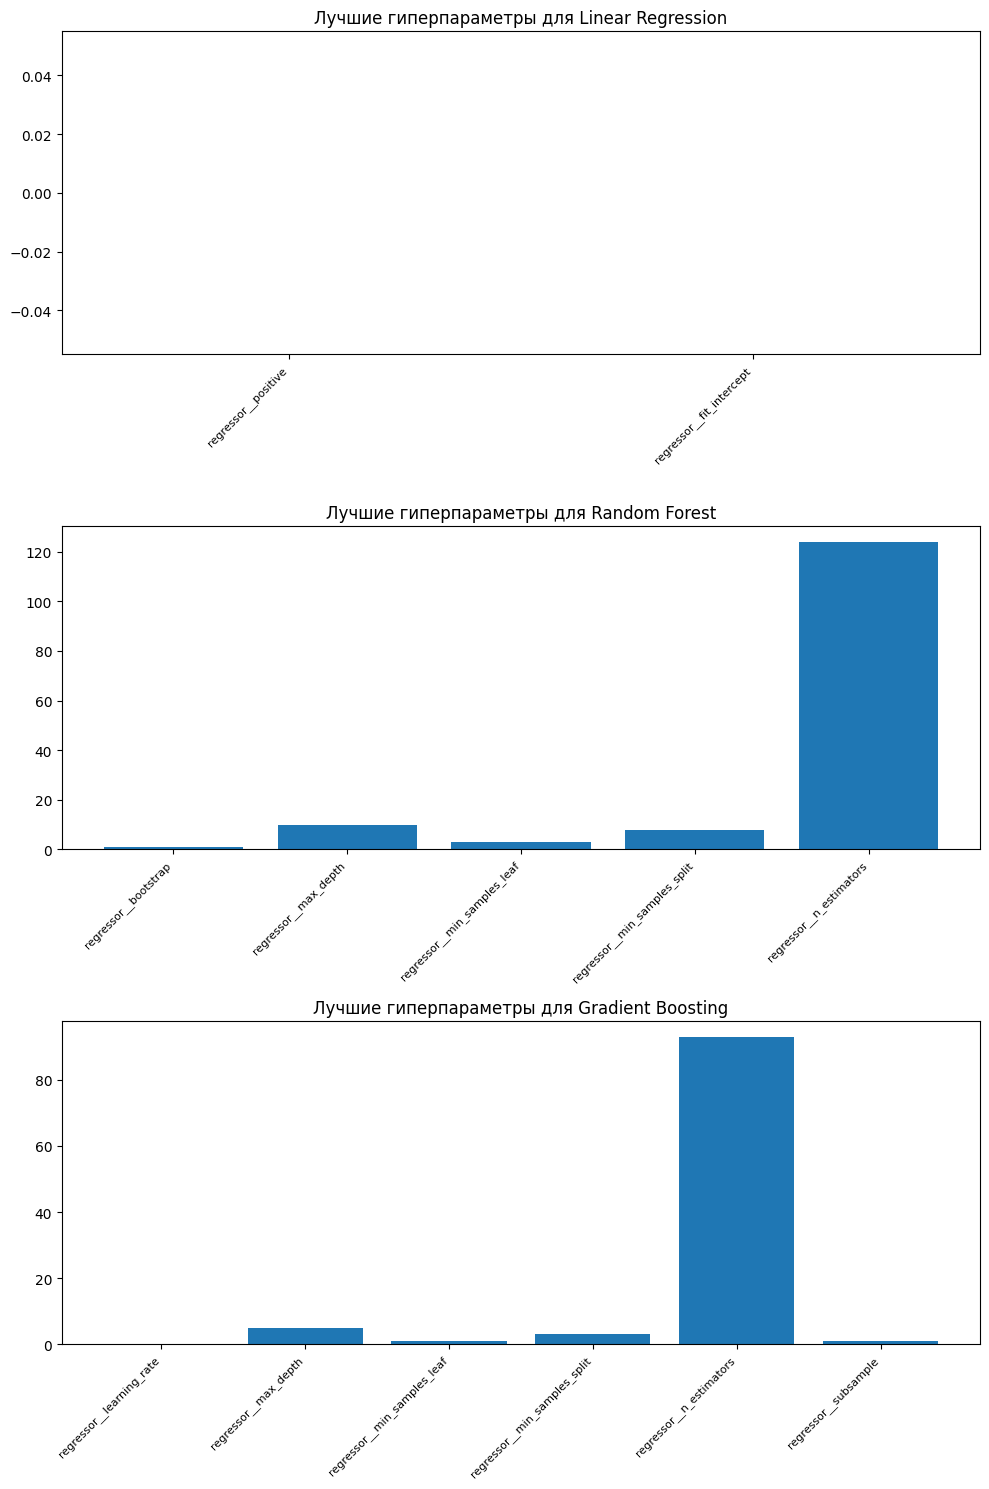

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from scipy.stats import uniform, randint

# Загрузка данных
df = pd.read_csv("..//static//csv//ds_salaries.csv")

# ... (ваш код предобработки данных, как в предыдущем примере) ...

# Определение распределений для гиперпараметров
param_distributions = {
  'Linear Regression': {
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]
  },
  'Random Forest': {
    'regressor__n_estimators': randint(50, 200),
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': randint(2, 11),
    'regressor__min_samples_leaf': randint(1, 5),
    'regressor__bootstrap': [True, False]
  },
  'Gradient Boosting': {
    'regressor__n_estimators': randint(50, 200),
    'regressor__learning_rate': uniform(0.01, 0.49), # uniform distribution for learning rate
    'regressor__max_depth': [3, 5, 7],
    'regressor__min_samples_split': randint(2, 11),
    'regressor__min_samples_leaf': randint(1, 5),
    'regressor__subsample': uniform(0.5, 0.5) # uniform distribution for subsample

  }
}

# Словарь для хранения лучших моделей и их гиперпараметров
best_models = {}

# Цикл для обучения и настройки гиперпараметров каждой модели
for model_name, model_params in param_distributions.items():
  if model_name == 'Linear Regression':
    model = LinearRegression()
  elif model_name == 'Random Forest':
    model = RandomForestRegressor(random_state=42)
  elif model_name == 'Gradient Boosting':
    model = GradientBoostingRegressor(random_state=42)
  else:
    continue #Обработка неизвестных моделей

  pipeline = Pipeline([('regressor', model)])
  random_search = RandomizedSearchCV(pipeline, param_distributions=model_params, n_iter=10, cv=3, n_jobs=-1, random_state=42)
  random_search.fit(X_train, y_train)
  best_models[model_name] = random_search.best_params_


# Визуализация лучших гиперпараметров

fig, axes = plt.subplots(len(best_models), 1, figsize=(10, 5 * len(best_models)))
if len(best_models) == 1:
  axes = [axes] # обработка случая с одной моделью

for i, (model_name, params) in enumerate(best_models.items()):
  axes[i].bar(params.keys(), params.values())
  axes[i].set_title(f"Лучшие гиперпараметры для {model_name}")
  axes[i].set_xticklabels(params.keys(), rotation=45, ha="right") #Поворачиваем подписи на оси х
  axes[i].tick_params(axis='x', which='major', labelsize=8) # Размер шрифта подписей оси х

plt.tight_layout()
plt.show()
